In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [150]:
df = pd.read_csv('~/Downloads/newtonsdata.csv')
df.fillna(0, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.drop(columns=['ETFs'], inplace=True)
df = df.loc['2024-05-01':]

In [151]:
df.head()

,High,XRT,FNDA,VT,MDY,VTI,IWB,VBR,VIOO,VXF,VTV,IJH,ESPO,STXK,GAMR,TXS,BKSE
Date,,,,,,,,,,,,,,,,,
2024-05-01,11.32,2425.0,3905.0,0.0,0.0,17022.0,3.0,0.0,0.0,356.0,0.0,413.0,0.0,0.0,0.0,0.0,0.0
2024-05-02,12.88,84.0,872.0,27.0,372.0,268.0,6753.0,0.0,0.0,0.0,635.0,44.0,0.0,308.0,0.0,0.0,11.0
2024-05-03,17.45,778.0,0.0,0.0,381.0,39.0,0.0,0.0,0.0,0.0,1128.0,48.0,0.0,517.0,0.0,0.0,0.0
2024-05-06,17.40,0.0,1531.0,0.0,1064.0,26552.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568.0,0.0,0.0,0.0
2024-05-07,17.29,281.0,1047.0,0.0,66591.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488.0,0.0,0.0,0.0


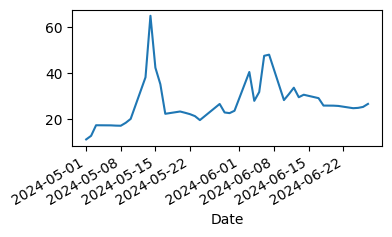

In [152]:
_ = df['High'].plot(figsize=(4,2))

In [153]:
etf_cols = [c for c in df.columns if c != 'High']

In [154]:
for c in etf_cols:
    df[c] = df[c].diff()
df = df.iloc[1:]

df = pd.DataFrame(StandardScaler().fit_transform(df), index=df.index, columns=df.columns)
df.head()


,High,XRT,FNDA,VT,MDY,VTI,IWB,VBR,VIOO,VXF,VTV,IJH,ESPO,STXK,GAMR,TXS,BKSE
Date,,,,,,,,,,,,,,,,,
2024-05-02,-1.501394,-0.036475,-0.483666,0.000989,0.004919,-1.768628,1.249769,0.0,-0.048189,-0.305504,0.075436,-0.124108,0.0,0.100630,0.0,0.0,0.016428
2024-05-03,-1.044071,-0.022629,-0.127291,-0.000989,-0.001665,0.022486,-1.250296,0.0,-0.048189,0.008016,0.058567,0.005052,0.0,0.068285,0.0,0.0,-0.070582
2024-05-06,-1.049075,-0.029344,0.268993,0.000000,0.010559,2.921003,0.000014,0.0,-0.048189,0.008016,-0.134002,-0.012954,0.0,0.016663,0.0,0.0,-0.027077
2024-05-07,-1.060082,-0.024513,-0.063305,0.000000,1.186578,-2.830616,0.000014,0.0,-0.048189,0.008016,0.000000,0.003667,0.0,-0.026138,0.0,0.0,-0.027077
2024-05-08,-1.065086,0.448395,0.471340,0.144872,2.936514,1.126203,0.385124,0.0,-0.048189,0.008016,0.001426,0.003667,0.0,-0.159439,0.0,0.0,0.320964


In [155]:
df.describe()

,High,XRT,FNDA,VT,MDY,VTI,IWB,VBR,VIOO,VXF,VTV,IJH,ESPO,STXK,GAMR,TXS,BKSE
count,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,39.000000,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01
mean,3.700743e-17,2.846726e-17,-8.629137e-18,-1.138690e-17,2.099460e-17,9.963540e-18,-1.423363e-17,-1.138690e-17,5.693451e-18,-1.058626e-17,0.000000,1.745843e-17,7.116814e-19,4.270089e-18,-2.846726e-18,-3.416071e-17,2.562053e-17
std,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00
min,-1.501394e+00,-2.687347e+00,-2.612351e+00,-4.076432e+00,-4.634465e+00,-2.830616e+00,-4.066226e+00,-3.510803e+00,-3.673022e+00,-2.553866e+00,-3.623647,-4.096896e+00,-3.718432e+00,-4.108180e+00,-4.339572e+00,-4.388691e+00,-2.036217e+00
25%,-5.557260e-01,-1.174625e-01,-3.654240e-01,-2.359610e-02,-1.559335e-02,2.221541e-02,-5.386408e-02,0.000000e+00,-4.818903e-02,8.016398e-03,-0.012058,-4.643608e-03,0.000000e+00,-1.457172e-01,0.000000e+00,0.000000e+00,-5.174968e-01
50%,-2.074799e-01,-2.595958e-02,1.651235e-02,0.000000e+00,-1.828028e-03,4.730727e-02,1.424222e-05,0.000000e+00,-4.818903e-02,8.016398e-03,0.000000,3.666941e-03,0.000000e+00,-7.514564e-03,0.000000e+00,0.000000e+00,-2.707655e-02
75%,2.908722e-01,2.721656e-01,3.422137e-01,1.951392e-02,5.262569e-02,5.998869e-02,9.693969e-02,0.000000e+00,1.025433e-01,8.456735e-03,0.038668,3.666941e-03,0.000000e+00,1.043871e-01,0.000000e+00,2.470182e-02,3.605136e-01
max,3.697279e+00,2.394560e+00,2.645376e+00,4.060725e+00,2.936514e+00,2.921003e+00,3.681144e+00,3.510803e+00,2.664334e+00,3.417108e+00,3.621390,4.485130e+00,3.849309e+00,4.465285e+00,4.339572e+00,3.565297e+00,2.840300e+00


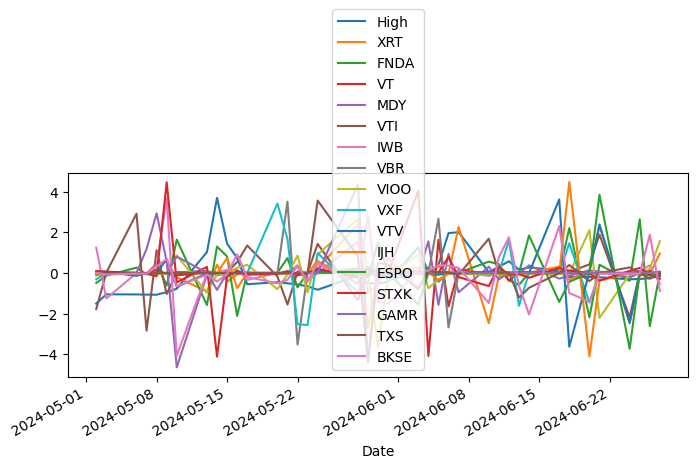

In [156]:
_ = df.plot(figsize=(8,3))

In [157]:
from sklearn.metrics import mean_squared_error

In [158]:
mean_squared_error(df['High'], df['VTI'])

1.8782723932047072

In [159]:
from sklearn.linear_model import Lasso, LinearRegression

In [160]:
y = df['High']
X = df[[c for c in df.columns if c != 'High']]
X.shape, y.shape

((39, 16), (39,))

In [161]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

In [162]:
mean_squared_error(y, y_pred)

0.610764800887369

In [163]:
coef_df = pd.DataFrame({'feature': X.columns, 'coef': lr.coef_})
coef_df.sort_values(by='coef', inplace=True)
coef_df

,feature,coef
12,STXK,-0.639343
11,ESPO,-0.321337
3,MDY,-0.264869
6,VBR,-0.217638
14,TXS,-0.177667
7,VIOO,-0.124014
13,GAMR,-0.099883
15,BKSE,-0.077735
1,FNDA,-0.025922
2,VT,0.003922


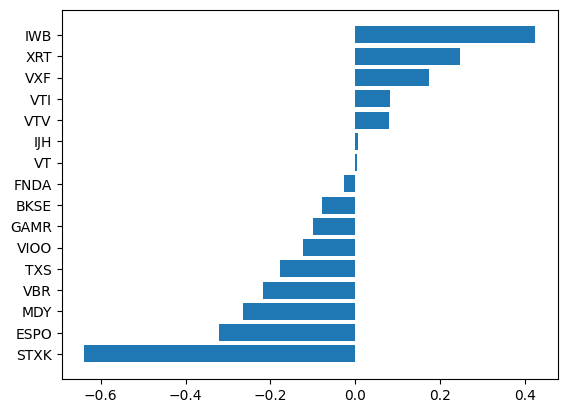

In [164]:
fig, ax = plt.subplots()

_ = ax.barh(coef_df['feature'], coef_df['coef'])

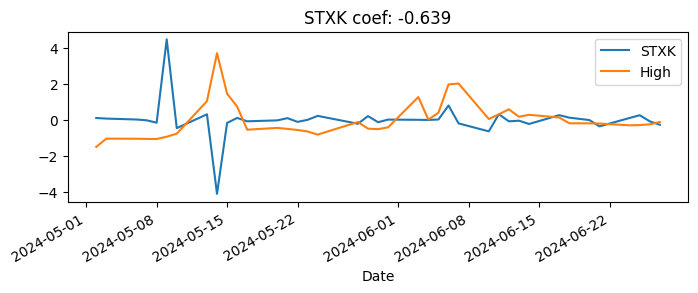

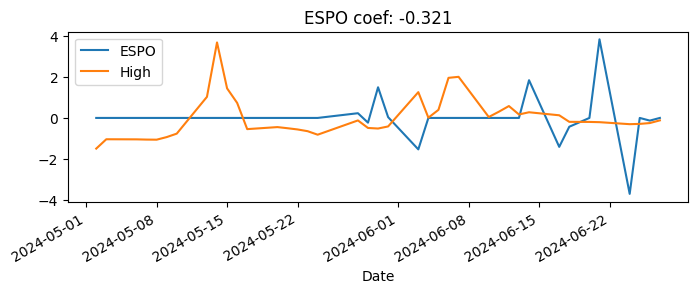

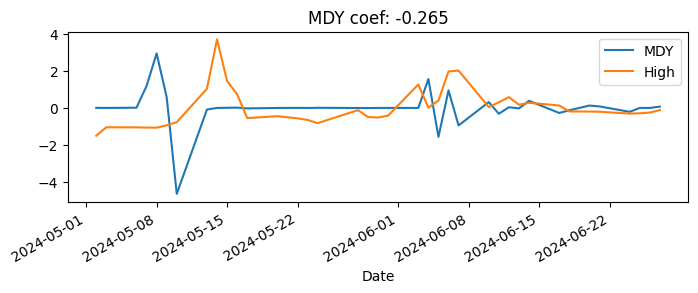

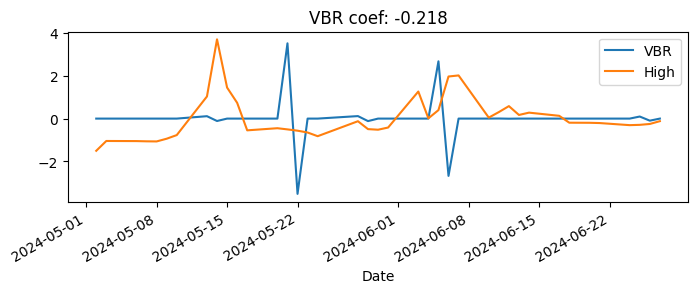

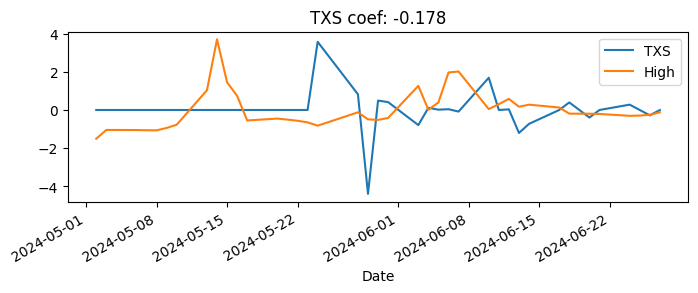

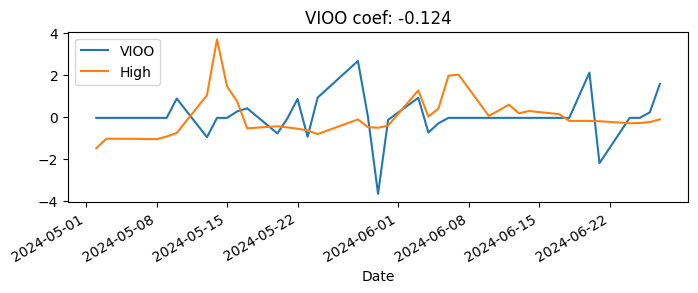

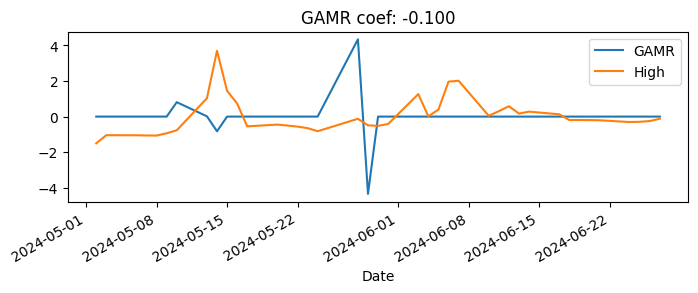

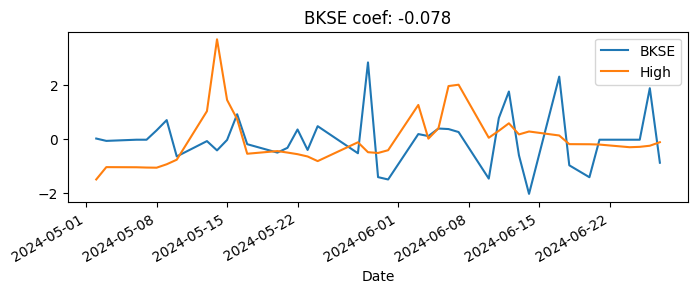

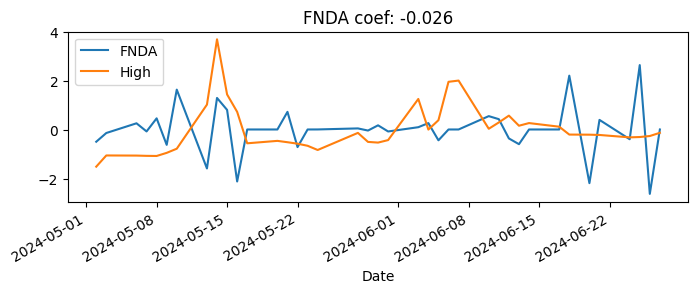

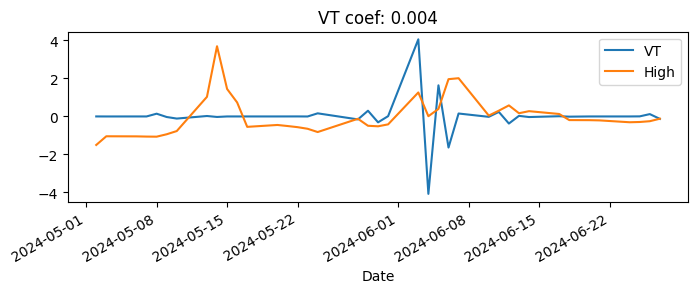

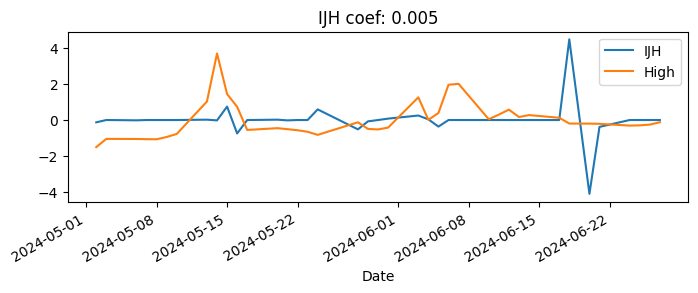

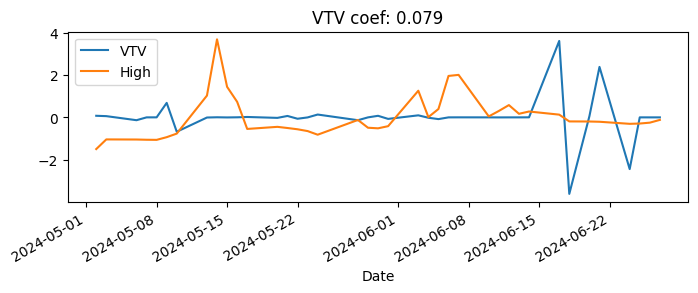

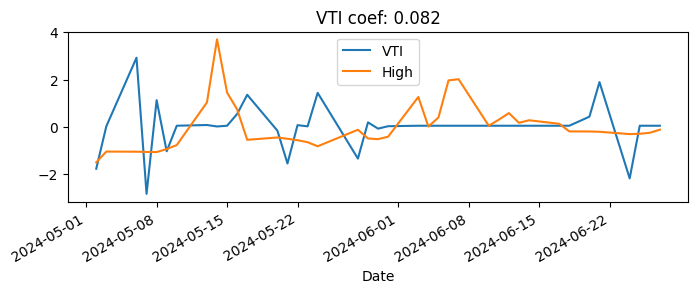

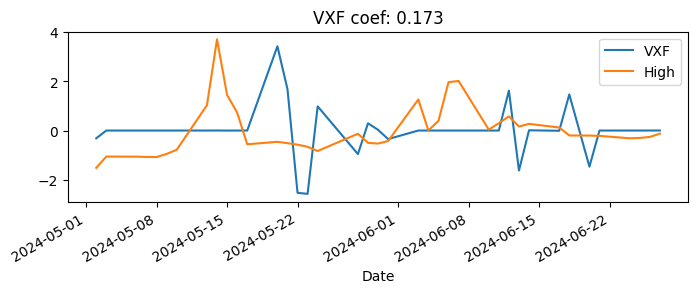

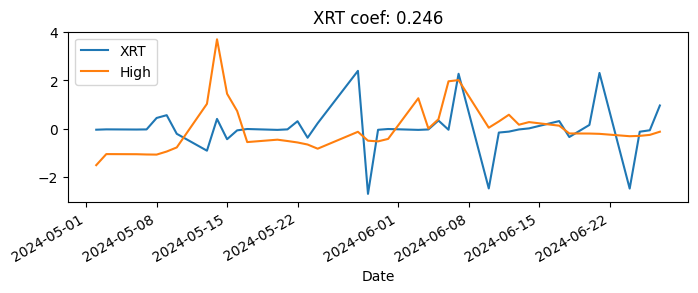

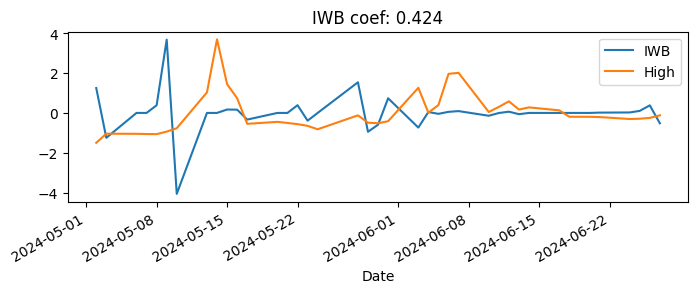

In [171]:
for _,row in coef_df.iterrows():
    c = row['feature']
    coef = row['coef']

    ax = df[[c, 'High']].plot(figsize=(8,2.5))
    _ = ax.set_title(f'{c} coef: {coef:.3f}')
    plt.show()